<h1 style="color: #AA1358;">Cluster Modeling</h1>

<h2 style="color: #AA1358;">Libraries</h2>

In [1]:
## Basic libraries
import pandas as pd 
import numpy as np 

## EDA Libraries
import matplotlib.pyplot as plt
import seaborn as sns

## ML libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

<h2 style="color: #AA1358;">Loading Dataset</h2>

In [2]:
data = pd.read_csv('data/cleaned_data.csv')

df = data.copy()

In [3]:
# Display the first few rows of the dataframe to have a sneak peek
df.head(10)

,income,age,childrenhome,wine_products,fruit_products,meat_products,fish_products,sweet_products,gold_products,deal_purchases,web_purchases,catalog_purchases,store_purchases,web_visits_permonth,marital_status_Single,education_Higher Education
0,0.045799,1.300757,1.193302,-0.689513,-0.509498,-0.683019,-0.510580,-0.647551,-0.766724,-0.220196,-0.988863,-0.328846,-1.049477,-0.375633,True,False
1,1.464431,0.331833,-1.572785,0.689431,1.418097,0.446412,2.555898,0.653642,0.871083,-0.807131,1.828310,0.135159,1.716161,-0.896574,False,False
2,-1.060069,-1.341764,-0.189741,-0.689513,-0.389023,-0.552341,-0.285517,-0.517431,-0.812218,-0.220196,-0.586409,-0.792851,-0.358067,0.145308,False,False
3,0.716630,-1.077512,-0.189741,-0.151226,1.177148,0.362405,0.727265,1.044000,-0.357272,1.540610,0.620950,0.599164,0.333342,-0.375633,False,True
4,0.953546,0.155665,-0.189741,1.001770,1.136989,0.175722,-0.566845,2.019894,-0.402767,-0.220196,1.023403,1.063169,1.716161,0.145308,False,True
5,0.567407,-0.196671,-0.189741,0.054784,2.060628,0.791776,0.839796,2.475312,0.188664,0.953674,1.425857,0.599164,0.679047,0.145308,True,False
6,-0.677860,-1.429848,-0.189741,-0.473534,-0.148074,-0.216312,-0.482447,-0.647551,0.006685,-0.220196,0.218497,-0.792851,-0.358067,1.187190,False,True
7,0.364934,-1.253680,-0.189741,-0.709449,-0.348865,-0.683019,-0.566845,-0.582491,-0.994197,-0.807131,-0.988863,-0.792851,-1.049477,0.666249,False,False
8,-2.134948,-0.637091,-1.572785,-0.706126,0.092876,-0.636348,-0.257384,-0.647551,-0.311777,-0.807131,-0.586409,-0.792851,-0.703772,1.187190,False,False
9,0.776196,1.476925,1.193302,0.048139,-0.469339,-0.244314,-0.482447,-0.387312,-0.402767,0.366739,1.023403,-0.328846,-0.012363,0.145308,True,True


<h2 style="color: #AA1358;">Modeling the clusters</h2>

<h4 style="color: #AA1358;">Elbow Method</h4>

To find the optimal number of clusters for our algorithm we are going to use the Elbow Method, a graphical method for finding the optimal K value.

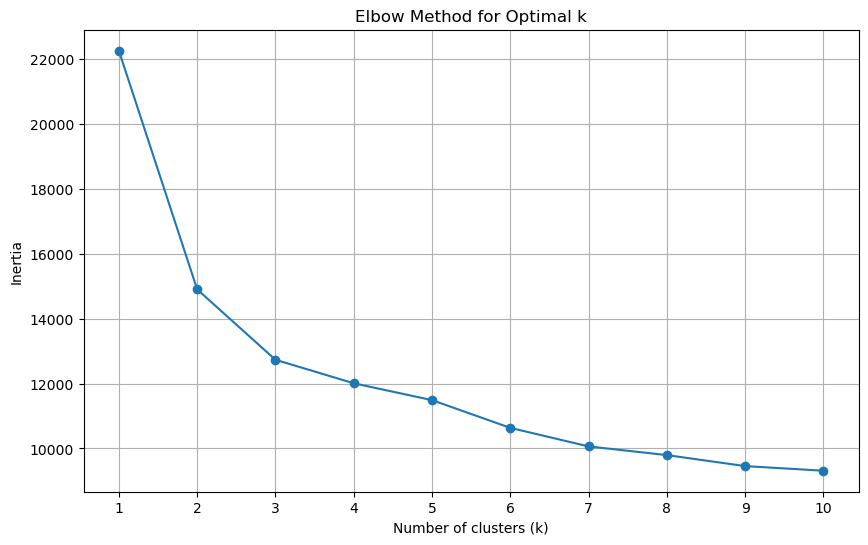

In [4]:
# With this method, we can determine the optimal number of clusters (k) for KMeans

inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

- Looks like 3 is the point break where the curve stops decreasing sharply and starts to flatten. K = 3 is the most stactistically choice according with the plot.

<h4 style="color: #AA1358;">Applying KMeans</h4>

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)

# Adding the cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Display the first few rows of the dataframe with cluster labels
df.head(10)

,income,age,childrenhome,wine_products,fruit_products,meat_products,fish_products,sweet_products,gold_products,deal_purchases,web_purchases,catalog_purchases,store_purchases,web_visits_permonth,marital_status_Single,education_Higher Education,Cluster
0,0.045799,1.300757,1.193302,-0.689513,-0.509498,-0.683019,-0.510580,-0.647551,-0.766724,-0.220196,-0.988863,-0.328846,-1.049477,-0.375633,True,False,0
1,1.464431,0.331833,-1.572785,0.689431,1.418097,0.446412,2.555898,0.653642,0.871083,-0.807131,1.828310,0.135159,1.716161,-0.896574,False,False,2
2,-1.060069,-1.341764,-0.189741,-0.689513,-0.389023,-0.552341,-0.285517,-0.517431,-0.812218,-0.220196,-0.586409,-0.792851,-0.358067,0.145308,False,False,0
3,0.716630,-1.077512,-0.189741,-0.151226,1.177148,0.362405,0.727265,1.044000,-0.357272,1.540610,0.620950,0.599164,0.333342,-0.375633,False,True,1
4,0.953546,0.155665,-0.189741,1.001770,1.136989,0.175722,-0.566845,2.019894,-0.402767,-0.220196,1.023403,1.063169,1.716161,0.145308,False,True,1
5,0.567407,-0.196671,-0.189741,0.054784,2.060628,0.791776,0.839796,2.475312,0.188664,0.953674,1.425857,0.599164,0.679047,0.145308,True,False,2
6,-0.677860,-1.429848,-0.189741,-0.473534,-0.148074,-0.216312,-0.482447,-0.647551,0.006685,-0.220196,0.218497,-0.792851,-0.358067,1.187190,False,True,0
7,0.364934,-1.253680,-0.189741,-0.709449,-0.348865,-0.683019,-0.566845,-0.582491,-0.994197,-0.807131,-0.988863,-0.792851,-1.049477,0.666249,False,False,0
8,-2.134948,-0.637091,-1.572785,-0.706126,0.092876,-0.636348,-0.257384,-0.647551,-0.311777,-0.807131,-0.586409,-0.792851,-0.703772,1.187190,False,False,0
9,0.776196,1.476925,1.193302,0.048139,-0.469339,-0.244314,-0.482447,-0.387312,-0.402767,0.366739,1.023403,-0.328846,-0.012363,0.145308,True,True,1


<h2 style="color: #AA1358;">Analyzing the new clusters</h2>

And let's visualize how our clients were clustered throug Kmeans. 

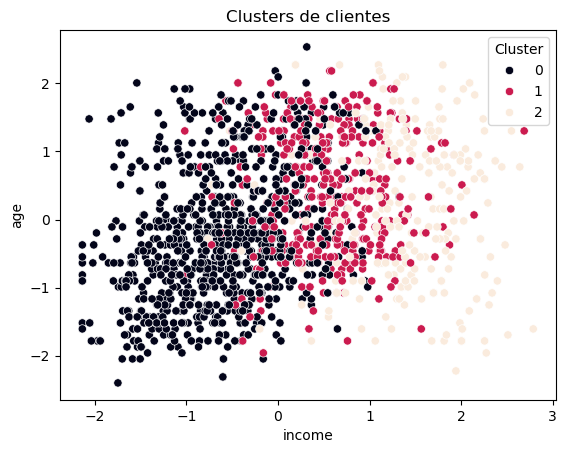

In [12]:
sns.scatterplot(x='income', y='age', hue='Cluster', data=df, palette='rocket')
plt.title('Clusters de clientes')
plt.show()

As we can observe in the visualization, Kmeans created clusters highly related with the income and age value. It has sense, as we appreciate at the correlation matrix in our previous notebook

In [14]:
# Let's load the original data with no scaling to compare with these new cluster

df_original = pd.read_csv('data/cleaned_data_no_scaling.csv', index_col=0)

# Adding the cluster labels to the original dataframe
df_original['Cluster'] = kmeans.labels_

<Axes: xlabel='income', ylabel='age'>

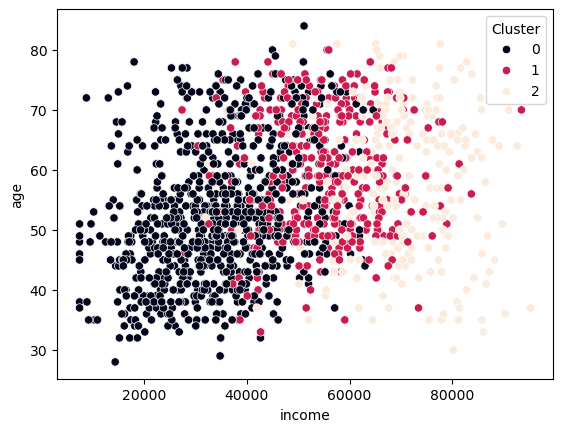

In [16]:
# And now, lets visualize the clusters in the original data
sns.scatterplot(x='income', y='age', hue='Cluster', data=df_original, palette='rocket')

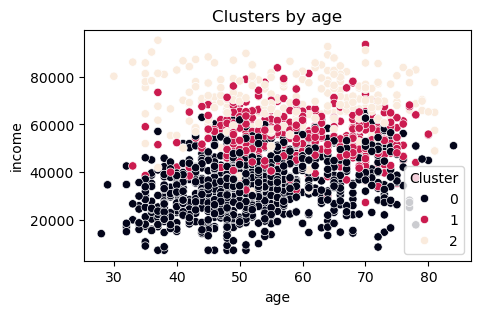

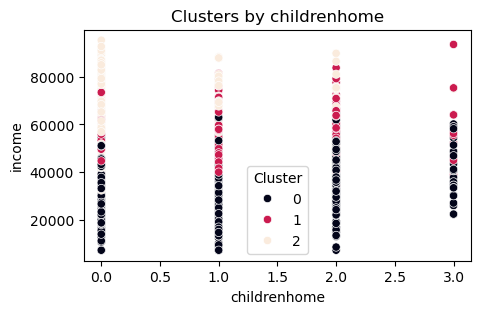

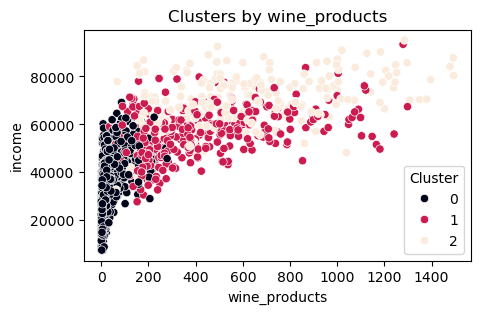

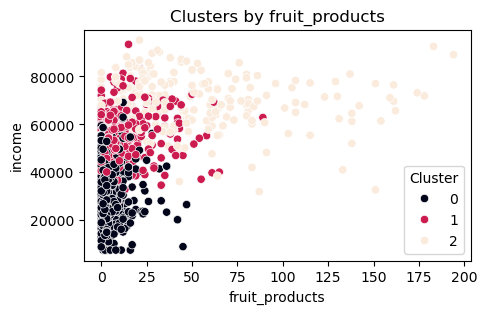

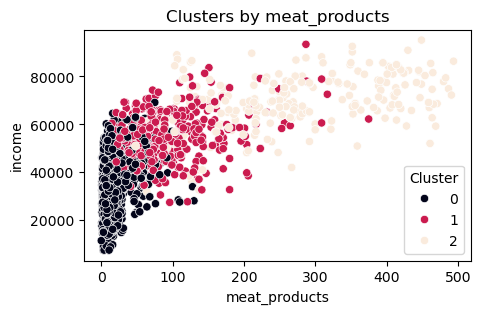

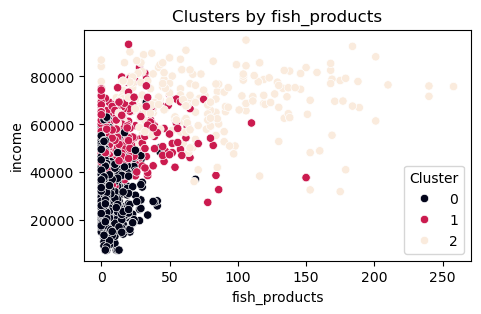

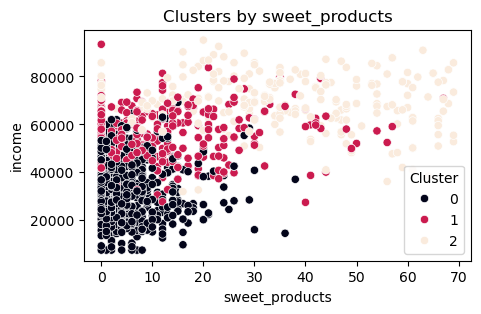

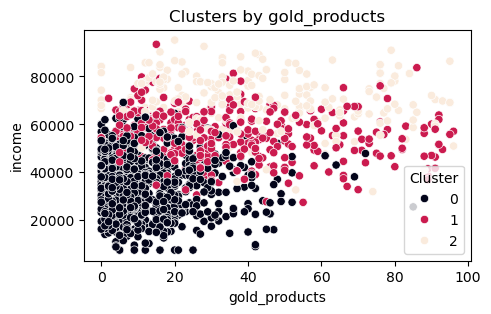

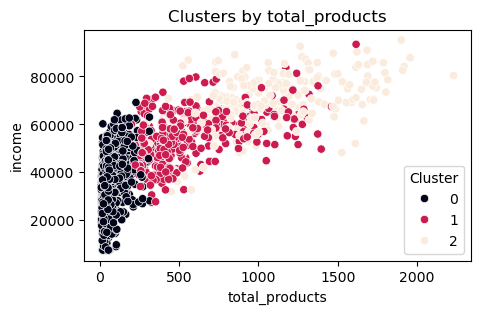

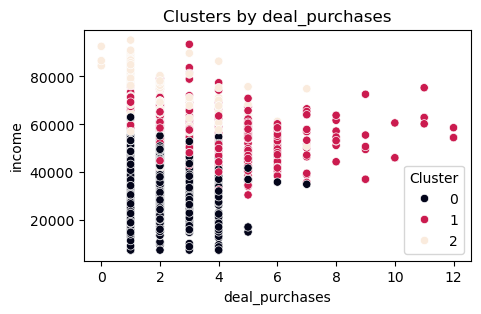

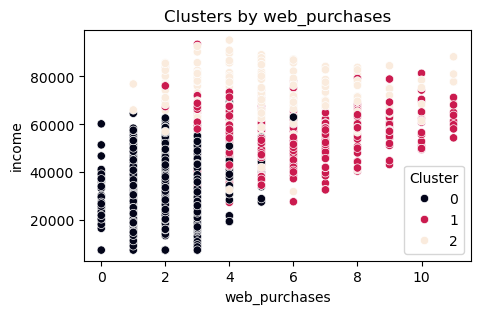

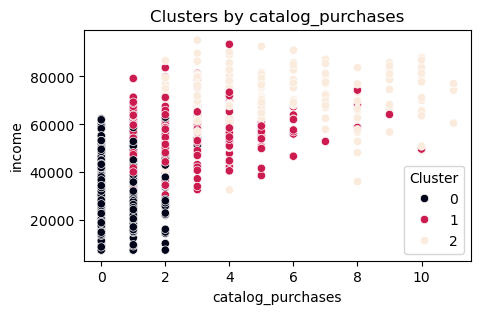

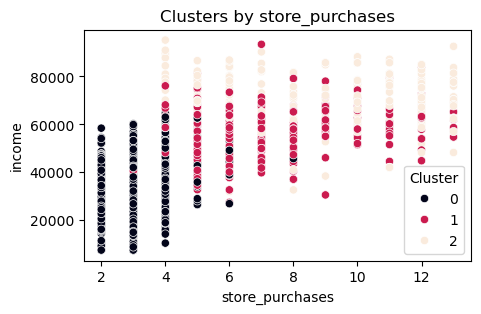

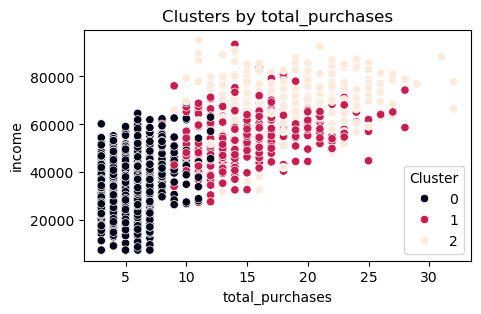

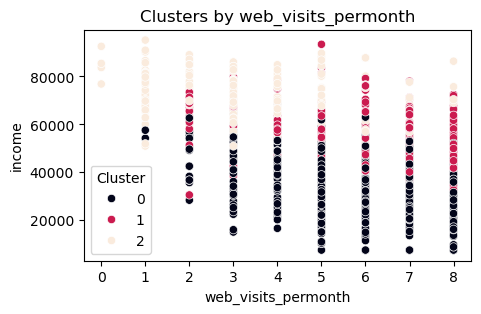

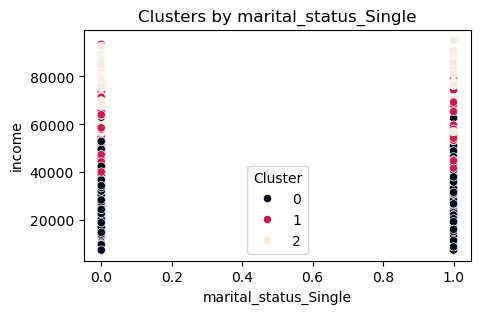

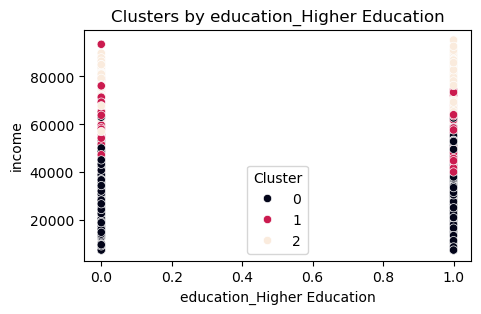

In [18]:
# How about the rest of the features? Let's visualize them too

for feature in df_original.columns[:-1]:  # Exclude the 'Cluster' column
    plt.figure(figsize=(5, 3))
    sns.scatterplot(x=feature, y='income', hue='Cluster', data=df_original, palette='rocket')
    plt.title(f'Clusters by {feature}')
    plt.show()

The visualizations are quite clear in showing the criteria the algorithm used to classify customers into clusters.

It is evident that the algorithm mainly followed the patterns set by the **'income'** and **'age'** variables, as the values of these features are key to revealing other consumption behaviors and preferences.

Next steps will be visualize the specific characteristics of the 3 cluster, using Power BI

<h2 style="color: #AA1358;">Export Clients + Clusters</h2>

In [20]:
# Now, let's save the clustered data to a new CSV file
df_original.to_csv('data/clustered_data.csv', index=False)